
Training No Regularization...
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9262 - loss: 0.2557 - val_accuracy: 0.9613 - val_loss: 0.1284
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9723 - loss: 0.0920 - val_accuracy: 0.9729 - val_loss: 0.0878
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9824 - loss: 0.0567 - val_accuracy: 0.9743 - val_loss: 0.0874
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9882 - loss: 0.0377 - val_accuracy: 0.9738 - val_loss: 0.0903
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9910 - loss: 0.0286 - val_accuracy: 0.9768 - val_loss: 0.0806
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9928 - loss: 0.0228 - val_accuracy: 0.9789 - val_loss: 0.0790
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9947 - loss: 0.0164 - val_accuracy: 0.9777 - val_loss: 0.0964
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9941 - 

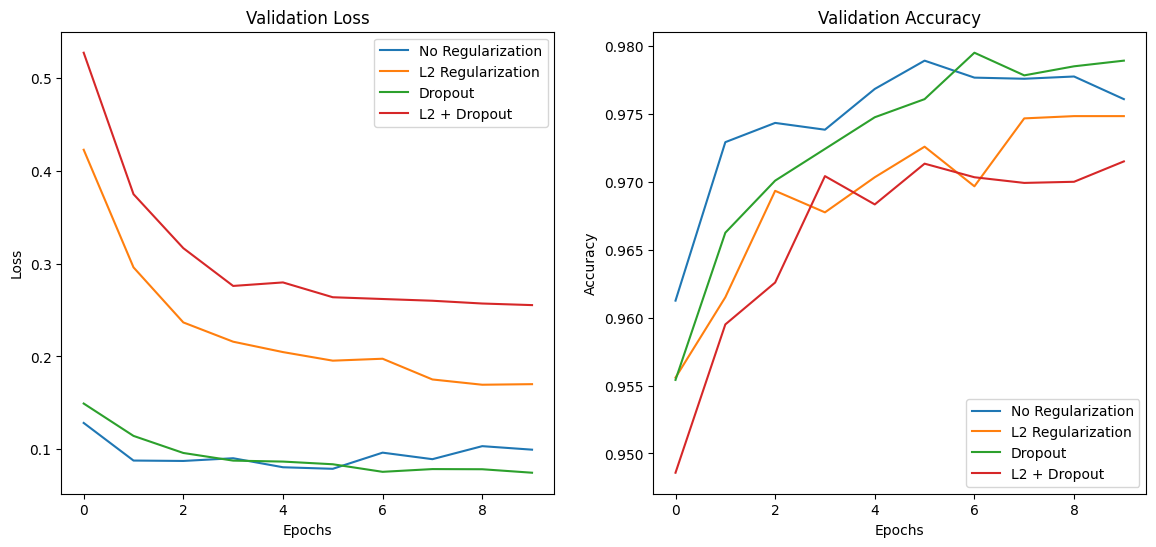

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

def build_model(use_l2=False, use_dropout=False):
    model = models.Sequential()
    if use_l2:
        reg = regularizers.l2(0.001)
    else:
        reg = None

    model.add(layers.Dense(512, activation='relu', kernel_regularizer=reg, input_shape=(784,)))
    if use_dropout:
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=reg))
    if use_dropout:
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

models_history = {}

configs = {
    "No Regularization": (False, False),
    "L2 Regularization": (True, False),
    "Dropout": (False, True),
    "L2 + Dropout": (True, True)
}

for name, (use_l2, use_dropout) in configs.items():
    print(f"\nTraining {name}...")
    model = build_model(use_l2, use_dropout)
    history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                        validation_split=0.2, verbose=1)
    models_history[name] = history

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
for name, history in models_history.items():
    plt.plot(history.history['val_loss'], label=f"{name}")
plt.title("Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
for name, history in models_history.items():
    plt.plot(history.history['val_accuracy'], label=f"{name}")
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Load MNIST dataset from CSV using NumPy
# -----------------------------
train_data = np.loadtxt("C:/Users/Rohit/Downloads/mnist_train.csv", delimiter=",")
test_data = np.loadtxt("C:/Users/Rohit/Downloads/mnist_test.csv", delimiter=",")

# Split features (X) and labels (y)
y_train, x_train = train_data[:, 0], train_data[:, 1:]
y_test, x_test = test_data[:, 0], test_data[:, 1:]

# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# -----------------------------
# 2️⃣ Build Model Function
# -----------------------------
def build_model(use_l2=False, use_dropout=False):
    reg = tf.keras.regularizers.l2(0.001) if use_l2 else None
    
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=reg, input_shape=(784,)))
    if use_dropout:
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=reg))
    if use_dropout:
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# -----------------------------
# 3️⃣ Train Models with Different Regularizations
# -----------------------------
models_history = {}

configs = {
    "No Regularization": (False, False),
    "L2 Regularization": (True, False),
    "Dropout": (False, True),
    "L2 + Dropout": (True, True)
}

for name, (use_l2, use_dropout) in configs.items():
    print(f"\nTraining {name}...")
    model = build_model(use_l2, use_dropout)
    history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                        validation_split=0.2, verbose=1)
    models_history[name] = history

# -----------------------------
# 4️⃣ Plot Results
# -----------------------------
plt.figure(figsize=(14,6))

# Plot Validation Loss
plt.subplot(1,2,1)
for name, history in models_history.items():
    plt.plot(history.history['val_loss'], label=name)
plt.title("Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot Validation Accuracy
plt.subplot(1,2,2)
for name, history in models_history.items():
    plt.plot(history.history['val_accuracy'], label=name)
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
